In [216]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
DATA_URL="D:\МИЗ\Мавньенгва П.Т/"

In [2]:
# winequality-white.csv is a ';' separated csv file.
white_wine=pd.read_csv(DATA_URL+"winequality-white.csv",sep=';')
red_wine = pd.read_csv(DATA_URL+"winequality-red.csv",sep=';')

In [3]:
# Review Datasets
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine.shape

(1599, 12)

In [7]:
white_wine.shape

(4898, 12)

In [8]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])   # concatenating horizontally since by default axis=0

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

### Understand dataset features and values

In [12]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,NaN
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium


In [14]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


In [15]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# data Analysis and Visualizations


In [17]:
sorted(wines['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

#### Barplot is chosen since the wine quality is limited to certain values. Despite being similar to continuous data, it's more more similar to categorical ones. Using barplot can give us a better overview with the distribution. Other data is being plot as distplot.

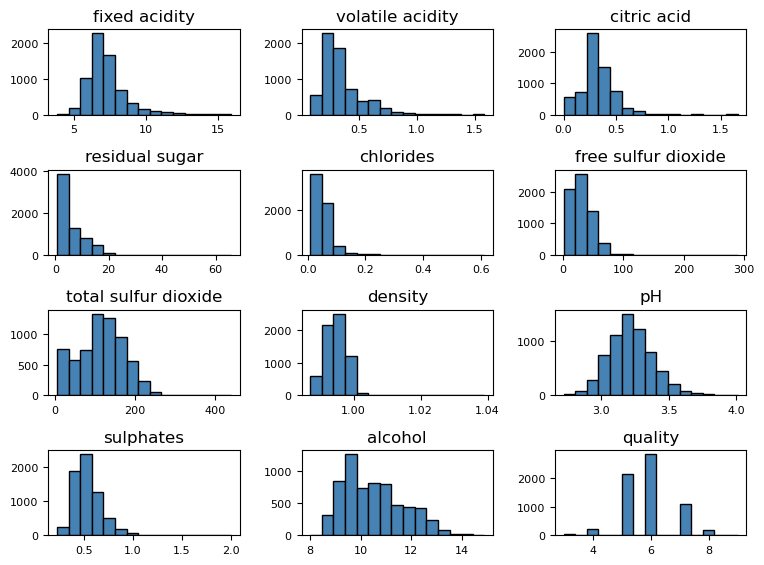

In [28]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [63]:

count_cat = wines.nunique() # it shows us how much unique examples we have in each feature

In [64]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
quality_label             3
dtype: int64

In [69]:
wines_df['type'].value_counts() 

White    4898
Red      1599
Name: type, dtype: int64

In [71]:
# The distribution of the examples in our dataset
wines_df['type'].value_counts("white")*100 # in %
wines_df['type'].value_counts("red")*100 # in %

White    75.388641
Red      24.611359
Name: type, dtype: float64

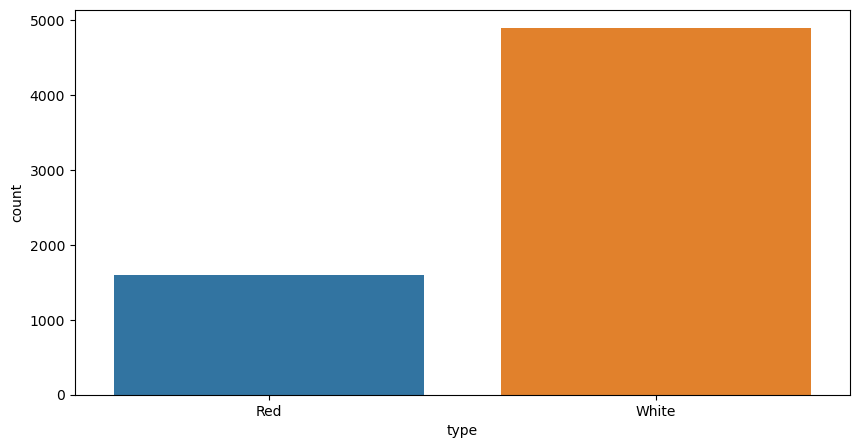

In [73]:
plt.figure(figsize = (10,5))
sns.countplot(x = wines_df['type']); # we will plot it for better illustration

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.


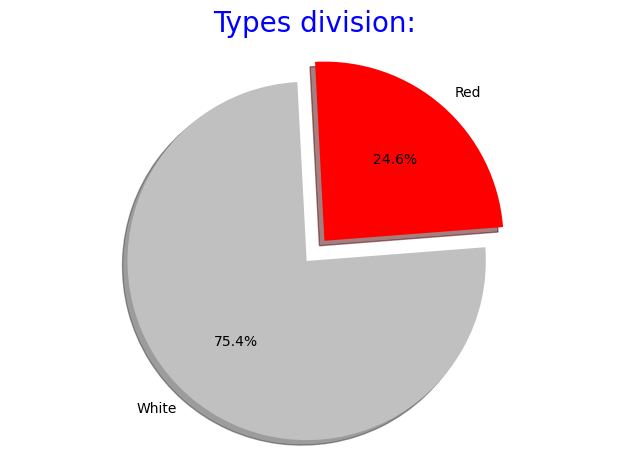

In [75]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

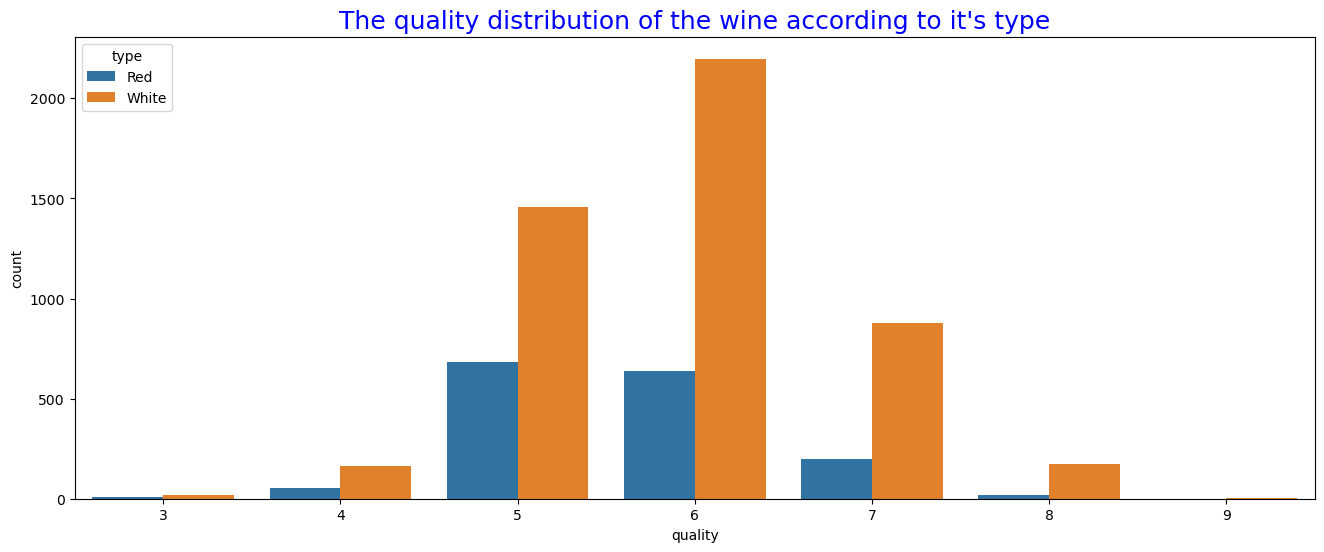

In [79]:
# another plot to show us more intersting details about the dataset
plt.figure(figsize = (16,6))
plt.title("The quality distribution of the wine according to it's type", size=18, color='b')
sns.countplot(x=wines_df['quality'], hue = wines_df['type']);

We can see that we have some quality for each wine. Let's take a look on it:

In [102]:
wines["quality"].value_counts() # the amount of wine we have from each quality number

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Let's try something else, we will groupby the wine into type groups to see which one has a greater quality:

In [110]:
df_types = wines_df.groupby('type') #by type
df_types

In [111]:
df_types.quality.mean() # the mean of the quality for each type

type
Red      5.636023
White    5.877909
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [123]:
encoder = LabelEncoder()
wines_df['type'] = encoder.fit_transform(wines_df['type'])
# red = 0
# white = 1

In [124]:
wines_df["type"].value_counts()


1    4898
0    1599
Name: type, dtype: int64

In [126]:
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,medium


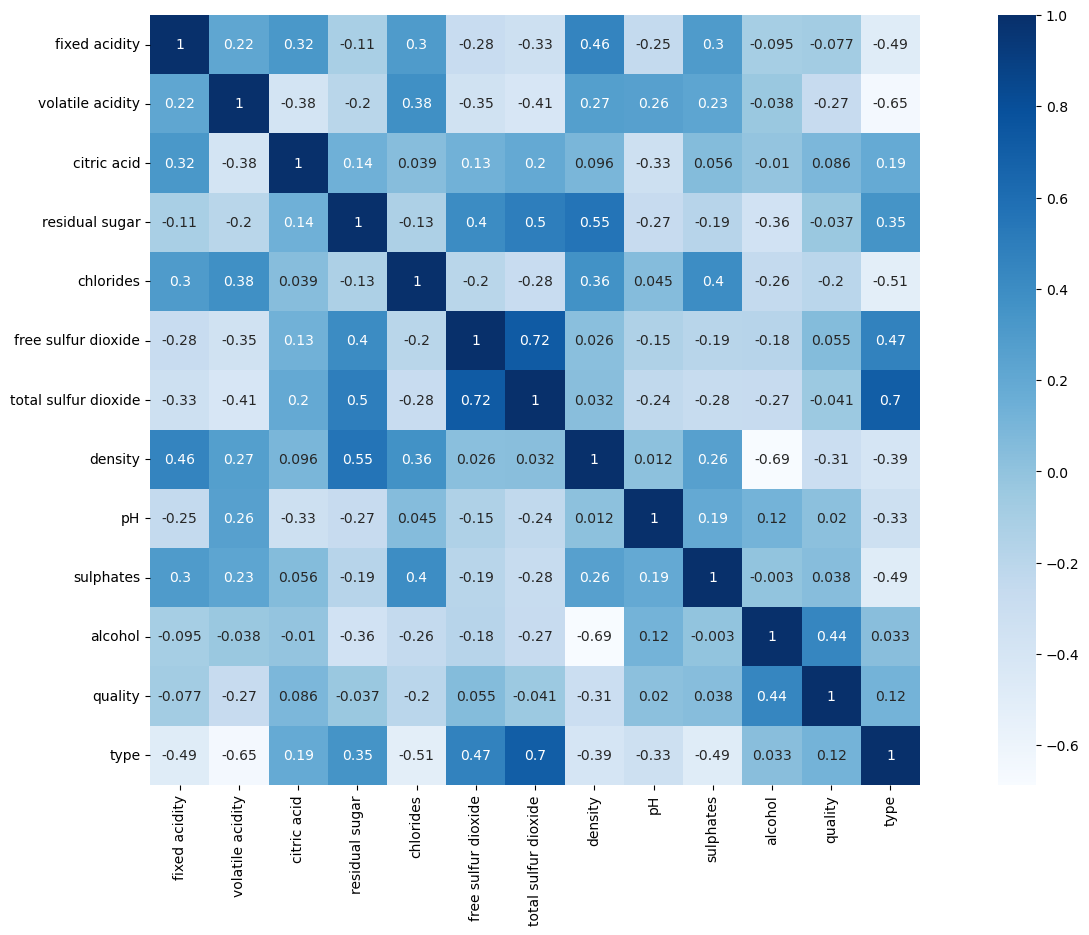

In [131]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(wines_df.corr(), square=True, annot=True, cmap="Blues");


Heatmap is a super important tool, because it tells us the bigger story. As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7 of correalation). free sulfur dioxide takes the 2nd place with 0.47 of correalation. After it, the residual sugar with 0.35 of correalation. Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

We would like to see the impact of total sulfur dioxide, free sulfur dioxide and residual sugar on the wine's type. Let's go back to the graphs.

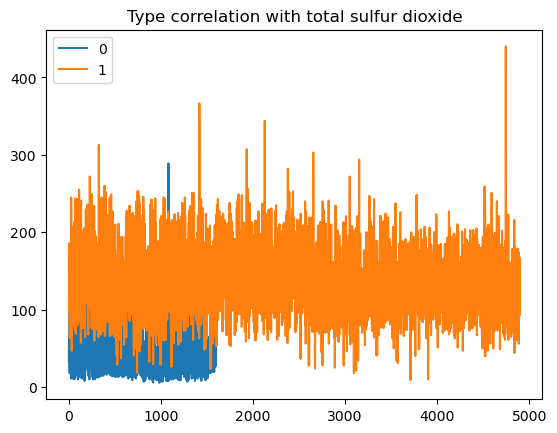

In [133]:
wines_df.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);
# the most important thing here is to watch the difference between the red and white wine
# we can also see that there are a few outliers 

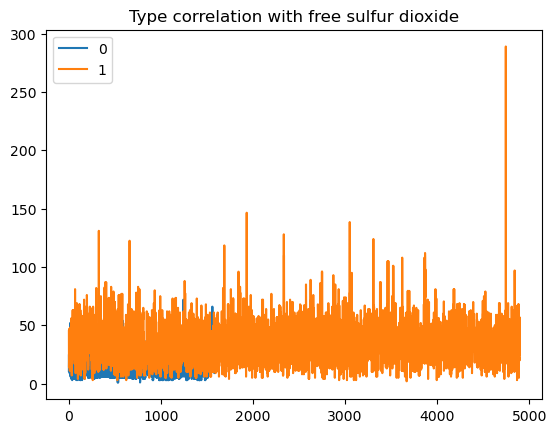

In [134]:
wines_df.groupby('type')['free sulfur dioxide'].plot(title="Type correlation with free sulfur dioxide", legend=True);

In [136]:
wines_df.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Scaling

In [138]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wines_df
df[features] = ss.fit_transform(df[features])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.93723,0,NaN
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.93723,0,NaN
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.93723,0,NaN


In [139]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

In [140]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

The default split is 75% train , 25% test.

### Split Test/ Train

In [157]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

In [160]:
X_train.shape # 3990 rows, 12 columns

(4872, 13)

In [162]:
X_test.shape # 1330 rows, 12 columns

(1625, 13)

In [165]:
y_train.shape # 3990 rows, one column

(4872,)

In [185]:
y_test.shape # 1330 rows, one columns

(1625,)

In [172]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')

In [175]:
# Split the output into a seperate set. 
X_new=df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
Y_new=df[['quality']]

In [168]:
# Split the data into train and test set with 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=40)

In [178]:
# Preview the split dataset
X_train.head()

,alcohol,density,volatile acidity,chlorides
908,0.258422,0.194556,1.095431,0.627050
1532,0.509969,-0.198981,-0.666161,-0.200790
986,-0.160823,-0.198981,-0.362438,-0.058059
1776,-0.580068,1.435201,-0.544672,0.370134
2845,0.342271,-0.529153,-0.726906,-0.800261


In [200]:
Y_train.head()

,quality
908,0.207999
1532,1.353228
986,0.207999
1776,-0.937230
2845,1.353228


In [204]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_newfeatures = df
X_new = StandardScaler().fit_transform(X_new

In [206]:
X_newfeatures.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0,NaN
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,0,NaN
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,0,NaN
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,0,NaN
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0,NaN


# Comments
As the data has been processed, we will proceed with Model Deployment. Different methods will be tested to finalize the best fit modal for the Wine Quality prediction. The following tests will be applied:

*Linear Regression

*Polynominal Regression